###Load Libraries


## Step 4 - Develop Model - Task 5 - Classification using Clustering

In [1]:
import pandas as pd
import numpy as np

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Set up environment and connect to Google Drive

In [4]:
using_Google_colab = False
using_Anaconda_on_Mac_or_Linux = True
using_Anaconda_on_windows = False

In [5]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

##DM5.1 Open Notebook and upload County Analytics Base table, normalize Total cases/Deaths for Top 50

### Upload County  level Data


In [6]:
if using_Google_colab:
  abt_by_county = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/abt_by_county.csv')
if using_Anaconda_on_Mac_or_Linux:
  abt_by_county = pd.read_csv('../output/abt_by_county.csv')
if using_Anaconda_on_windows:
  abt_by_county = pd.read_csv(r'..\output\abt_by_county.csv')
abt_by_county

,Unnamed: 0,Unnamed: 0.1,State,StateFIPS,County Name,countyFIPS,Date,Total Cases,Incremental Cases,cases moving_avg,...,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,0,AL,1,Statewide Unallocated,0,2020-01-22,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3193,AL,1,Statewide Unallocated,0,2020-01-23,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6386,AL,1,Statewide Unallocated,0,2020-01-24,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,9579,AL,1,Statewide Unallocated,0,2020-01-25,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12772,AL,1,Statewide Unallocated,0,2020-01-26,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353236,2353236,2337598,CT,9,Windham County,9015,2022-01-23,23067,0.0,201.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353237,2353237,2340791,CT,9,Windham County,9015,2022-01-24,23620,553.0,178.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353238,2353238,2343984,CT,9,Windham County,9015,2022-01-25,23811,191.0,186.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353239,2353239,2347177,CT,9,Windham County,9015,2022-01-26,23984,173.0,184.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
abt_by_county_clean = abt_by_county[abt_by_county['countyFIPS'] != 0]
abt_by_county_clean

,Unnamed: 0,Unnamed: 0.1,State,StateFIPS,County Name,countyFIPS,Date,Total Cases,Incremental Cases,cases moving_avg,...,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
737,737,1,AL,1,Autauga County,1001,2020-01-22,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,738,3194,AL,1,Autauga County,1001,2020-01-23,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,739,6387,AL,1,Autauga County,1001,2020-01-24,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,740,9580,AL,1,Autauga County,1001,2020-01-25,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,741,12773,AL,1,Autauga County,1001,2020-01-26,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353236,2353236,2337598,CT,9,Windham County,9015,2022-01-23,23067,0.0,201.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353237,2353237,2340791,CT,9,Windham County,9015,2022-01-24,23620,553.0,178.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353238,2353238,2343984,CT,9,Windham County,9015,2022-01-25,23811,191.0,186.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353239,2353239,2347177,CT,9,Windham County,9015,2022-01-26,23984,173.0,184.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
if using_Google_colab:
  county_population = pd.read_csv('/content/drive/MyDrive/COVID_Project/input/USA_Facts/covid_county_population_usafacts.csv')
if using_Anaconda_on_Mac_or_Linux:
  county_population = pd.read_csv('../input/USA_Facts/covid_county_population_usafacts.csv')
if using_Anaconda_on_windows:
  county_population = pd.read_csv(r'..\input\USA_Facts\covid_county_population_usafacts.csv')
county_population

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [14]:
abt_by_county_with_population = pd.merge(abt_by_county_clean, county_population, 
                                         on=['countyFIPS'], 
                                         suffixes=('', '_DROP'), 
                                         how='inner').filter(regex='^(?!.*_DROP)')
abt_by_county_with_population

,Unnamed: 0,Unnamed: 0.1,State,StateFIPS,County Name,countyFIPS,Date,Total Cases,Incremental Cases,cases moving_avg,...,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population
0,737,1,AL,1,Autauga County,1001,2020-01-22,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55869
1,738,3194,AL,1,Autauga County,1001,2020-01-23,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55869
2,739,6387,AL,1,Autauga County,1001,2020-01-24,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55869
3,740,9580,AL,1,Autauga County,1001,2020-01-25,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55869
4,741,12773,AL,1,Autauga County,1001,2020-01-26,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315649,2353236,2337598,CT,9,Windham County,9015,2022-01-23,23067,0.0,201.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116782
2315650,2353237,2340791,CT,9,Windham County,9015,2022-01-24,23620,553.0,178.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116782
2315651,2353238,2343984,CT,9,Windham County,9015,2022-01-25,23811,191.0,186.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116782
2315652,2353239,2347177,CT,9,Windham County,9015,2022-01-26,23984,173.0,184.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116782


### Filter data and normalize

Filter data for 12/19 (last date) and normalize total cases, total deaths by population

In [17]:
abt_by_county_last = abt_by_county_with_population[abt_by_county_with_population['Date'] == '2020-12-19']
abt_by_county_last['normalized_cases'] = abt_by_county_last['Total Cases']*10/abt_by_county_last['population']
abt_by_county_last['normalized_deaths'] = abt_by_county_last['Total Deaths']*1000/abt_by_county_last['population']

### Find top 50 counties by population

In [18]:
abt_by_county_sorted = abt_by_county_last.sort_values(by=['population'], ascending=False)
top_50 = abt_by_county_sorted[:50]
top_50

,Unnamed: 0,Unnamed: 0.1,State,StateFIPS,County Name,countyFIPS,Date,Total Cases,Incremental Cases,cases moving_avg,...,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,normalized_cases,normalized_deaths
2233442,2269555,1060285,CA,6,Los Angeles County,6037,2020-12-19,655974,15562.0,14552.428571,...,2020-12-19,-34.0,-10.0,-36.0,-39.0,-22.0,11.0,10039107,0.653419,0.966122
266389,272285,1060700,IL,17,Cook County,17031,2020-12-19,368824,2804.0,2766.142857,...,2020-12-19,-25.0,-3.0,-5.0,-32.0,-11.0,6.0,5150233,0.716131,1.491389
1782398,1811878,1062743,TX,48,Harris County,48201,2020-12-19,215779,1599.0,1561.285714,...,2020-12-19,-20.0,-12.0,-59.0,-27.0,-16.0,7.0,4713325,0.457806,0.737696
1413898,1437482,1060182,AZ,4,Maricopa County,4013,2020-12-19,277071,3045.0,3821.714286,...,2020-12-19,-19.0,-5.0,-38.0,-20.0,-13.0,6.0,4485414,0.617716,1.039146
2246708,2282821,1060303,CA,6,San Diego County,6073,2020-12-19,136603,2794.0,2908.285714,...,2020-12-19,-32.0,-11.0,-35.0,-45.0,-20.0,10.0,3338330,0.409196,0.418772
2241549,2277662,1060296,CA,6,Orange County,6059,2020-12-19,137813,3354.0,3195.428571,...,2020-12-19,-33.0,-4.0,-25.0,-30.0,-21.0,10.0,3175692,0.433962,0.652141
83613,86561,1060448,FL,12,Miami-Dade County,12086,2020-12-19,272098,2382.0,2376.571429,...,2020-12-19,-21.0,-10.0,-49.0,-36.0,-14.0,5.0,2716940,1.001487,1.490648
1749970,1779450,1062699,TX,48,Dallas County,48113,2020-12-19,169860,2248.0,1947.857143,...,2020-12-19,-19.0,-10.0,-32.0,-25.0,-14.0,5.0,2635516,0.644504,0.786184
1202379,1223015,1061960,NY,36,Kings County,36047,2020-12-19,107392,1037.0,1035.857143,...,2020-12-19,-35.0,-12.0,-9.0,-35.0,-21.0,8.0,2559903,0.419516,2.971597
2243760,2279873,1060299,CA,6,Riverside County,6065,2020-12-19,158374,3841.0,3614.428571,...,2020-12-19,-23.0,-4.0,-43.0,-31.0,-18.0,8.0,2470546,0.641049,0.784847


## DM5.2 Plot top 50 counties showing total cases (X Axis) and deaths (Y Axis)

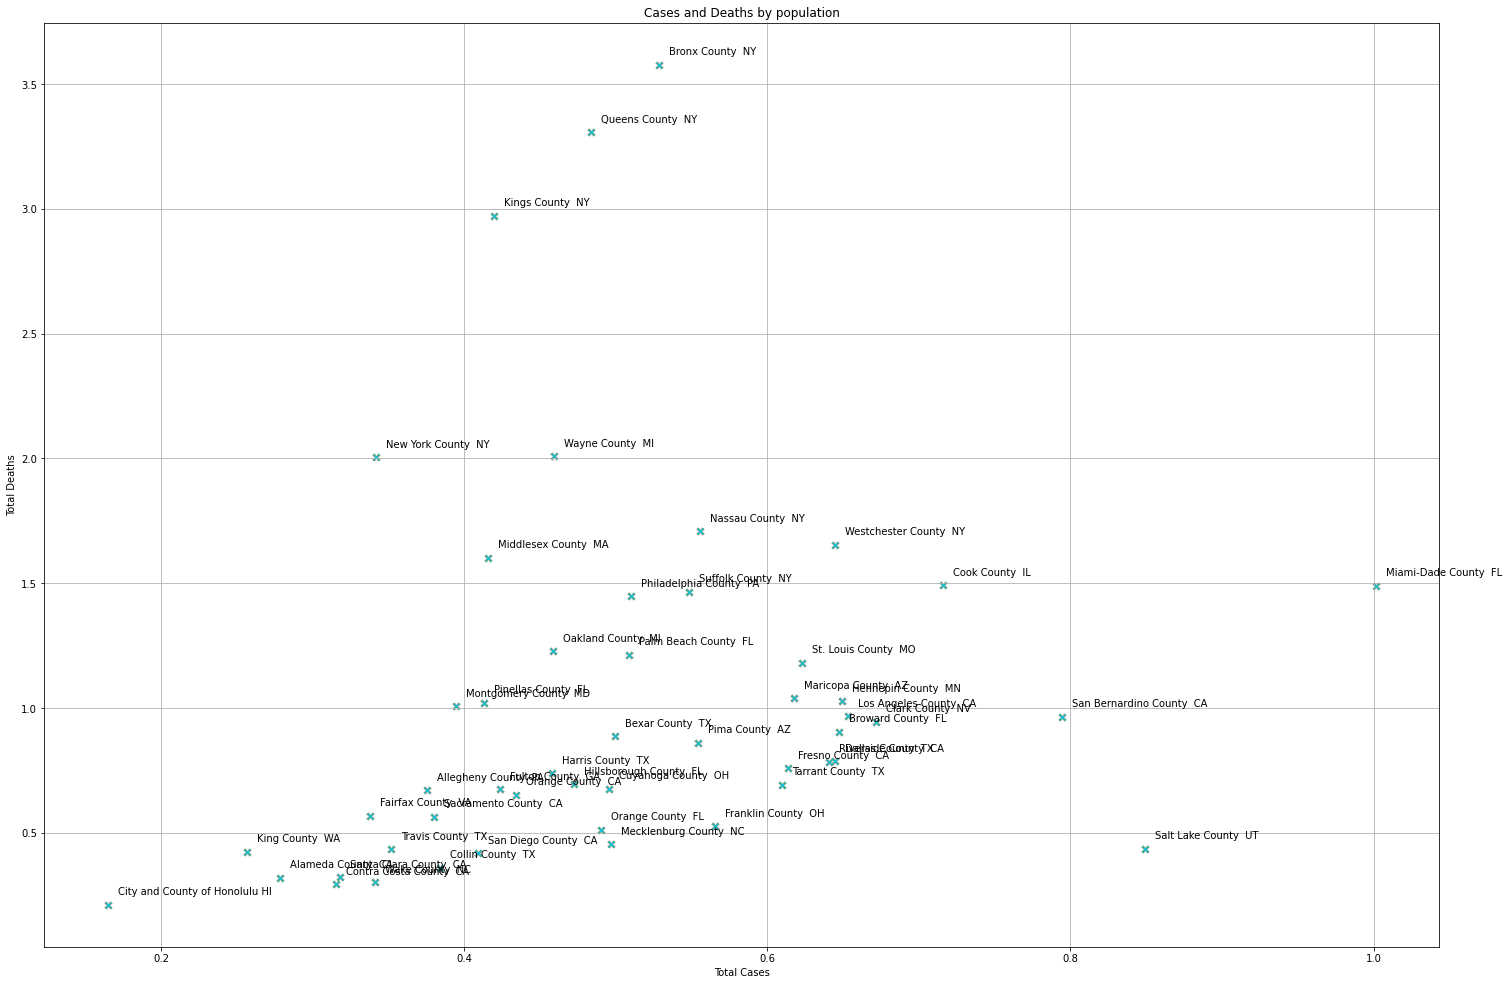

In [19]:
x_50 = top_50['normalized_cases'].values
y_50 = top_50['normalized_deaths'].values
types_50 = top_50['County Name'].values + " " + top_50['State'].values
fig, ax = plt.subplots(figsize=(25, 17))

plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
for i, txt in enumerate(types_50):
    ax.annotate(txt, (x_50[i], y_50[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x_50, y_50, marker='x')
plt.grid(True)
plt.show()




## DM5.3 Develop 4 Clusters using K-Means and view clusters

### Use Scikit Learn kmeans library for clustering data using total deaths and total cases

In [20]:
kmeans_50 = KMeans(n_clusters=4)
matrix = top_50[['normalized_cases', 'normalized_deaths']]
km_50 = kmeans_50.fit(matrix)
labels_50 = km_50.labels_
top_50['cluster'] = labels_50
labels_50

array([3, 1, 3, 3, 0, 0, 1, 3, 2, 3, 3, 2, 0, 3, 3, 3, 3, 0, 1, 0, 1, 1,
       1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 3, 3, 3, 0, 1], dtype=int32)

### Plot clustering results

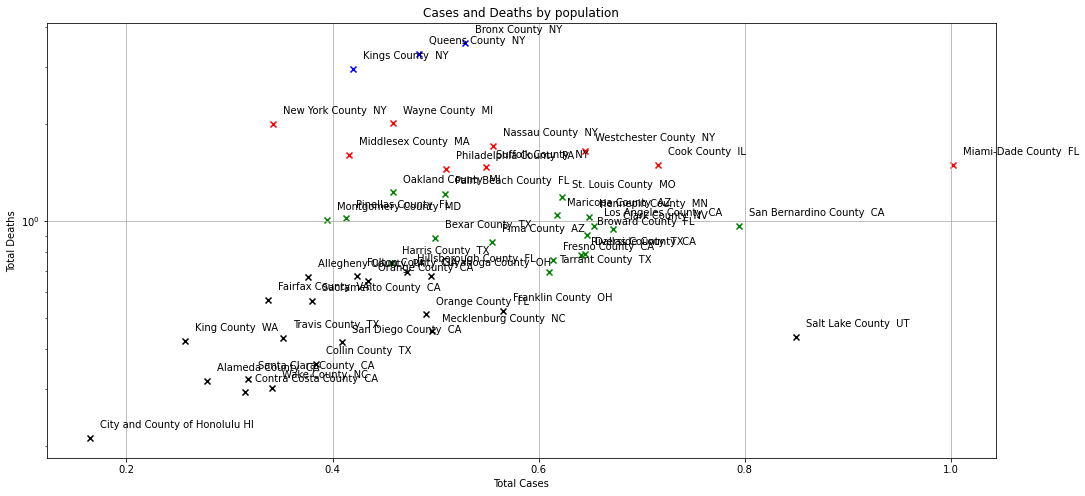

In [21]:
cluster_50 = labels_50
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
ax.set_yscale('log')
for i, txt in enumerate(types_50):
    ax.annotate(txt, (x_50[i], y_50[i]), xytext=(10,10), textcoords='offset points')
    if cluster_50[i] == 0:
      plt.scatter(x_50[i], y_50[i], marker='x', color='black')
    if cluster_50[i] == 1:
      plt.scatter(x_50[i], y_50[i], marker='x', color='red')
    if cluster_50[i] == 2:
      plt.scatter(x_50[i], y_50[i], marker='x', color='blue')
    if cluster_50[i] == 3:
      plt.scatter(x_50[i], y_50[i], marker='x', color='green')
plt.grid(True)
plt.show()

## DM5.4 Extaned analysis to top 1800 counties - leaving the tiny ones


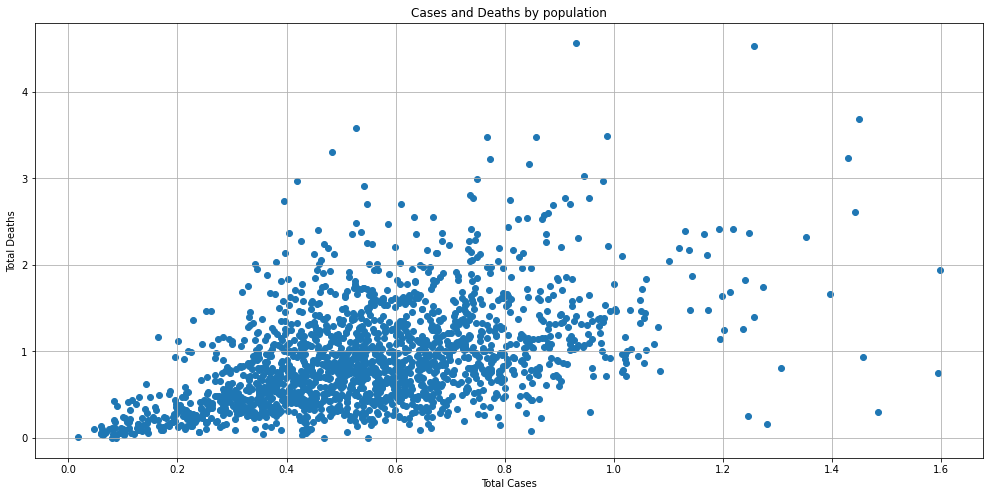

In [22]:
abt_by_county_top_1800 = abt_by_county_sorted[:1800]
x_1800 = abt_by_county_top_1800['normalized_cases'].values
y_1800 = abt_by_county_top_1800['normalized_deaths'].values

fig, ax = plt.subplots(figsize=(17, 8))

plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
ax.scatter(x_1800, y_1800)
plt.grid(True)
plt.show()

In [23]:
abt_by_county_sorted[1800:1801]

,Unnamed: 0,Unnamed: 0.1,State,StateFIPS,County Name,countyFIPS,Date,Total Cases,Incremental Cases,cases moving_avg,...,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,normalized_cases,normalized_deaths
948851,964328,1061609,MO,29,Clinton County,29049,2020-12-19,1409,11.0,14.714286,...,2020-12-19,NaN,NaN,NaN,NaN,0.0,NaN,20387,0.691127,2.452543


### Apply k-means to the larger set

In [24]:
kmeans_1800 = KMeans(n_clusters=4)
matrix = abt_by_county_top_1800[['normalized_cases', 'normalized_deaths']]
km_1800 = kmeans_1800.fit(matrix)
labels_1800 = km_1800.labels_
abt_by_county_top_1800['cluster'] = labels_1800
labels_1800

array([1, 0, 1, ..., 0, 3, 1], dtype=int32)

In [25]:
type(matrix['normalized_cases'])

pandas.core.series.Series

### Plot clustering results


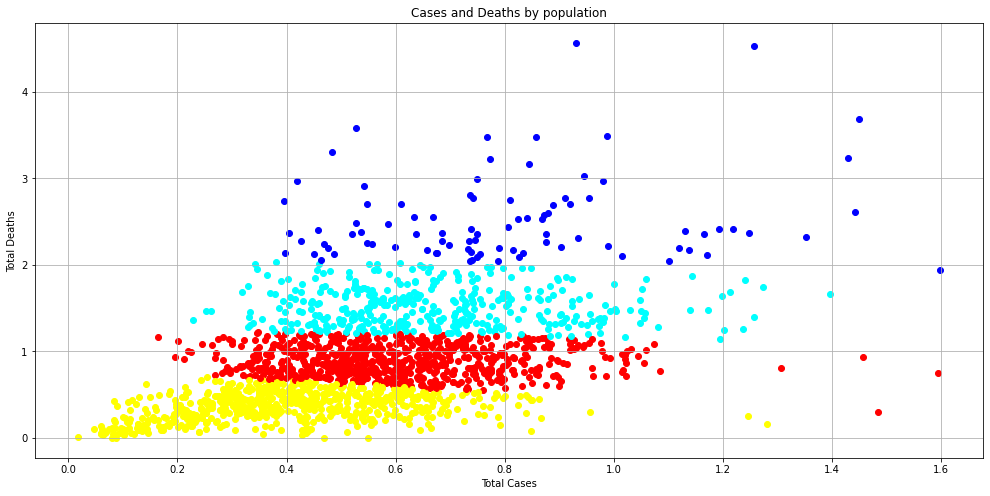

In [26]:
x_1800 = abt_by_county_top_1800['normalized_cases'].values
y_1800 = abt_by_county_top_1800['normalized_deaths'].values
cluster_1800 = abt_by_county_top_1800['cluster'].values
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
for i, cluster_code in enumerate(cluster_1800):
    if cluster_code == 0:
      plt.scatter(x_1800[i], y_1800[i], color='cyan')
    if cluster_code == 1:
      plt.scatter(x_1800[i], y_1800[i], color='red')
    if cluster_code == 2:
      plt.scatter(x_1800[i], y_1800[i], color='blue')
    if cluster_code == 3:
      plt.scatter(x_1800[i], y_1800[i], color='yellow')
plt.grid(True)
plt.show()